In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# import LazyRegressor

In [2]:
#loading training and testing data
Data_12month_booking = pd.read_csv('12month_flight_booking.csv')
Data_12month_revenue = pd.read_csv('12months_flight_revenue.csv')
Data_3month_booking = pd.read_csv('3months_flight_booking_prediction.csv')
Data_3month_revenue = pd.read_csv('3months_flight_revenue_prediction.csv')

In [20]:
Data_3month_revenue.head()

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Rev RDay: 9,Class RDay Rev RDay: 8,Class RDay Rev RDay: 7,Class RDay Rev RDay: 6,Class RDay Rev RDay: 5,Class RDay Rev RDay: 4,Class RDay Rev RDay: 3,Class RDay Rev RDay: 2,Class RDay Rev RDay: 1,Class RDay Rev RDay: 0
0,424,BBB,DDD,Y,T,NaN,AA,306,2023-10-02,06:05,...,216.92,216.92,216.92,216.92,216.92,217.84,217.84,219.58,329.34,329.31
1,425,BBB,DDD,Y,N,NaN,AA,306,2023-10-02,06:05,...,1269.99,1269.99,1269.99,1269.99,1269.99,1280.79,1280.79,1252.62,1252.53,1252.35
2,426,BBB,DDD,Y,L,NaN,AA,306,2023-10-02,06:05,...,197.20,197.20,197.20,197.20,197.20,195.13,195.13,191.47,191.45,191.41
3,427,BBB,DDD,Y,Q,NaN,AA,306,2023-10-02,06:05,...,112.39,112.39,112.39,112.39,112.39,115.91,115.91,114.51,114.50,114.49
4,428,BBB,DDD,Y,E,NaN,AA,306,2023-10-02,06:05,...,658.64,658.64,658.64,658.64,658.64,653.88,653.88,640.20,640.12,640.00


In [3]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_12month_booking[' Origin'] = label_encoder.fit_transform(Data_12month_booking[' Origin'])
Data_12month_booking[' Destination'] = label_encoder.fit_transform(Data_12month_booking[' Destination'])

In [4]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_12month_booking['Cabin'] = Data_12month_booking['Cabin'].map(cabin_mapping)

In [5]:
Airline_map = {'AA':1}
Data_12month_booking['Airline'] = Data_12month_booking['Airline'].map(Airline_map)

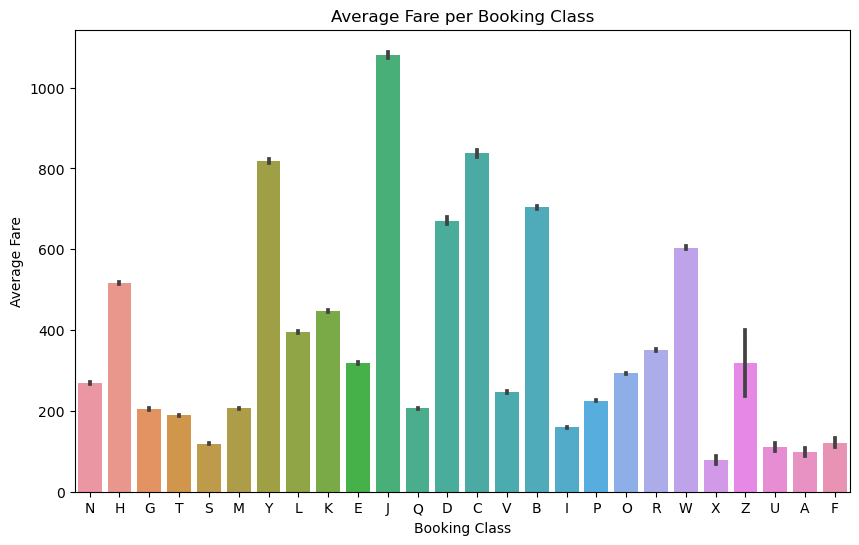

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Class', y=' Booking Class Fare USD ', data=Data_12month_booking)
plt.title('Average Fare per Booking Class')
plt.xlabel('Booking Class')
plt.ylabel('Average Fare')
plt.show()

In [7]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_3month_booking[' Origin'] = label_encoder.fit_transform(Data_3month_booking[' Origin'])
Data_3month_booking[' Destination'] = label_encoder.fit_transform(Data_3month_booking[' Destination'])

In [8]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_3month_booking['Cabin'] = Data_3month_booking['Cabin'].map(cabin_mapping)

In [9]:
Airline_map = {'AA':1}
Data_3month_booking['Airline'] = Data_3month_booking['Airline'].map(Airline_map)

In [10]:
label_encoder = LabelEncoder()
Data_12month_booking['Booking Class'] = label_encoder.fit_transform(Data_12month_booking['Booking Class'])


In [11]:
# Convert 'Dep_Date' to a numerical format (e.g., number of days since a specific date)
# Assuming the date is in the format 'YYYY-MM-DD'
Data_12month_booking['Dep_Date'] = pd.to_datetime(Data_12month_booking['Dep_Date'])
Data_12month_booking['Dep_Date_Numerical'] = (Data_12month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

In [12]:
# Split 'Dep_Time' into hours and minutes
Data_12month_booking['Dep_Hour'] = Data_12month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_12month_booking['Dep_Minute'] = Data_12month_booking['Dep_time'].str.split(':').str[1].astype(int)


In [13]:
# Drop the original 'Dep_Date' and 'Dep_Time' columns
Data_12month_booking = Data_12month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)


In [14]:
# Drop columns with all NaN values
Data_12month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_12month_booking) * 0.05  # 5% threshold
Data_12month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_12month_booking.fillna(0.00, inplace=True)

In [15]:
label_encoder = LabelEncoder()
Data_3month_booking['Booking Class'] = label_encoder.fit_transform(Data_3month_booking['Booking Class'])
Data_3month_booking['Dep_Date'] = pd.to_datetime(Data_3month_booking['Dep_Date'])
Data_3month_booking['Dep_Date_Numerical'] = (Data_3month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

Data_3month_booking['Dep_Hour'] = Data_3month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_3month_booking['Dep_Minute'] = Data_3month_booking['Dep_time'].str.split(':').str[1].astype(int)
Data_3month_booking = Data_3month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)

# Drop columns with all NaN values
Data_3month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_3month_booking) * 0.05  # 5% threshold
Data_3month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_3month_booking.fillna(0.00, inplace=True)


In [16]:
Features = [
    ' Origin', ' Destination', 'Cabin', 'Booking Class', 'Airline', 'Flight number',
    'Dep_Date_Numerical', 'Dep_Hour', 'Dep_Minute'
]

for i in range(310):
    feature_name = f'Class RDay Res Hold Total RDay: {i}'
    Features.append(feature_name)
    
# Assuming 'Data_12month_booking' contains the training data and 'Data_3month_booking' has test data
# Features and Target
X_train = Data_12month_booking[Features]  # Features for training
y_train = Data_12month_booking[' Booking Class Fare USD ']  # Target for training

X_test = Data_3month_booking[Features]  # Features for testing
y_test = Data_3month_booking[' Booking Class Fare USD ']  # Target for testing

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
import statsmodels.api as sm

In [19]:
# Initialize the Linear Regression model
# we cannot get feature importance for LinearRegression model
# we have to use stats model for the data in order to get p values

#fittng the model using the training data
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

print("Predicted values for the test set are: ")
print(y_pred)

# 1. The coefficients tell you the estimated change in the target variable for a one-unit change in the corresponding feature.
# 2. The p-values (P>|t|) indicate the statistical significance of each feature. If the p-value is less than your 
# chosen significance level (e.g., 0.05), you can reject the null hypothesis that the coefficient is zero.
# 3. The confidence intervals show the range within which you can be reasonably confident that the true population parameter lies.

# For example, taking the 'Origin' feature:

# 1. Coefficient: 51.9524 - This suggests that, on average, an increase of one unit in 
# the 'Origin' is associated with an increase of 51.9524 in the target variable.
# 2. P-value: 0.000 - This is very small, indicating that 'Origin' is likely a statistically significant predictor.
# 3. Confidence Interval: (50.884, 53.021) - We can be reasonably confident that the true population parameter for 'Origin' lies within this range.

                               OLS Regression Results                               
Dep. Variable:      Booking Class Fare USD    R-squared:                       0.467
Model:                                  OLS   Adj. R-squared:                  0.466
Method:                       Least Squares   F-statistic:                     538.4
Date:                      Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                              14:30:36   Log-Likelihood:            -1.3452e+06
No. Observations:                    195774   AIC:                         2.691e+06
Df Residuals:                        195455   BIC:                         2.694e+06
Df Model:                               318                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [23]:
model = Lasso()


# Fit the model using the training data
# model1.fit(X_train, y_train)
model.fit(X_train, y_train)


# Make predictions using the test data
# predictions1 = model1.predict(X_test)
predictions = model.predict(X_test)


feature_importance = model.coef_


# Pairing each feature with its importance
feature_effects = dict(zip(Features, feature_importance))

# Display feature effects
for feature, effect in feature_effects.items():
    print(f"Feature: {feature}, Importance: {effect}")

Feature:  Origin, Importance: 51.03638135022181
Feature:  Destination, Importance: 64.72925476972851
Feature: Cabin, Importance: -494.1749469094808
Feature: Booking Class, Importance: 2.0468022241522967
Feature: Airline, Importance: 0.0
Feature: Flight number, Importance: 0.13194032934703964
Feature: Dep_Date_Numerical, Importance: 0.054143470674791944
Feature: Dep_Hour, Importance: 6.559179014107535
Feature: Dep_Minute, Importance: -1.552666512966778
Feature: Class RDay Res Hold Total RDay: 0, Importance: -1.5167468088187934
Feature: Class RDay Res Hold Total RDay: 1, Importance: 2.475055729470276
Feature: Class RDay Res Hold Total RDay: 2, Importance: -2.3231898232059205
Feature: Class RDay Res Hold Total RDay: 3, Importance: -0.4581195254422446
Feature: Class RDay Res Hold Total RDay: 4, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 5, Importance: -0.5974413349640756
Feature: Class RDay Res Hold Total RDay: 6, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 7, 

In [24]:
model = Ridge()


model.fit(X_train, y_train)


predictions = model.predict(X_test)


feature_importance = model.feature_importances_

# Pairing each feature with its importance
feature_effects = dict(zip(Features, feature_importance))

# Display feature effects
for feature, effect in feature_effects.items():
    print(f"Feature: {feature}, Importance: {effect}")

AttributeError: 'Ridge' object has no attribute 'feature_importances_'

In [ ]:
model4 = ElasticNet()

model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

predictions3 = model3.predict(X_test)
predictions4 = model4.predict(X_test)

feature_importance3 = model3.feature_importances_ 
feature_importance4 = model4.feature_importances_

# Pairing each feature with its importance
feature_effects = dict(zip(Features, feature_importance2))

# Display feature effects
for feature, effect in feature_effects.items():
    print(f"Feature: {feature}, Importance: {effect}")

In [27]:
#Using DecisionTreeClassifier
# Assuming 'Data_12month_booking' contains the training data and 'Data_3month_booking' has test data
# Features and Target
X_train = Data_12month_booking[Features]  # Features for training
y_train = Data_12month_booking[' Booking Class Fare USD ']  # Target for training

X_test = Data_3month_booking[Features]  # Features for testing
y_test = Data_3month_booking[' Booking Class Fare USD ']  # Target for testing

# Initialize the Linear Regression model
model = DecisionTreeRegressor()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
predictions = model.predict(X_test)
feature_importance = model.feature_importances_

# Pairing each feature with its importance
feature_effects = dict(zip(Features, feature_importance))

# Display feature effects
for feature, effect in feature_effects.items():
    print(f"Feature: {feature}, Importance: {effect}")

Feature:  Origin, Importance: 0.193581688448128
Feature:  Destination, Importance: 0.030347367539000372
Feature: Cabin, Importance: 0.30148997023813806
Feature: Booking Class, Importance: 0.3518470439393373
Feature: Airline, Importance: 0.0
Feature: Flight number, Importance: 0.10638336442560166
Feature: Dep_Date_Numerical, Importance: 0.007128795091241206
Feature: Dep_Hour, Importance: 0.0001551969177067501
Feature: Dep_Minute, Importance: 0.00014531387785072386
Feature: Class RDay Res Hold Total RDay: 0, Importance: 8.319342402778848e-05
Feature: Class RDay Res Hold Total RDay: 1, Importance: 0.001150337337083732
Feature: Class RDay Res Hold Total RDay: 2, Importance: 3.391571782002225e-05
Feature: Class RDay Res Hold Total RDay: 3, Importance: 3.1518957049582446e-05
Feature: Class RDay Res Hold Total RDay: 4, Importance: 1.0380049823540298e-05
Feature: Class RDay Res Hold Total RDay: 5, Importance: 2.439099518088988e-05
Feature: Class RDay Res Hold Total RDay: 6, Importance: 2.19882